# **Apple Stock Price Prediction for the Next 30 Days**


## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/AAPL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
df.shape

(2011, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
# Converting Date to datetime and seting it as the index

df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.set_index('Date', inplace=True)

In [9]:
df.sort_index(inplace=True)

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [11]:
# Checking for missing values and handling it

print("Missing values before handling:\n", df.isnull().sum())
df = df.dropna()

Missing values before handling:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [12]:
# Adding basic time series features

df['Return'] = df['Close'].pct_change() # Calculates the daily return as a percentage change from the previous day’s closing price.
df['MA_7'] = df['Close'].rolling(window=7).mean() # Computes the 7-day moving average of the closing price.
df['MA_30'] = df['Close'].rolling(window=30).mean() # Calculates the 30-day moving average of the closing price
df['Volatility_30'] = df['Close'].rolling(window=30).std() # Computes the 30-day rolling standard deviation of the closing price, a proxy for volatility.

In [13]:
df.dropna(inplace=True)

In [14]:
# Display the cleaned dataset

print("Cleaned dataset sample:\n")
df.head()

Cleaned dataset sample:



,Open,High,Low,Close,Adj Close,Volume,Return,MA_7,MA_30,Volatility_30
Date,,,,,,,,,,
2012-02-14,72.094284,72.794289,71.714287,72.779999,62.892056,115099600,0.013649,69.553674,63.574667,4.048272
2012-02-15,73.465714,75.184288,70.984283,71.095711,61.436600,376530000,-0.023142,70.241429,63.986286,4.166554
2012-02-16,70.214287,72.127144,69.518570,71.744286,61.997032,236138000,0.009123,70.922653,64.409000,4.291253
2012-02-17,71.872856,72.538574,71.471428,71.731430,61.985954,133951300,-0.000179,71.441837,64.809428,4.397642
2012-02-21,72.411430,73.550003,72.017143,73.550003,63.557446,151398800,0.025353,71.884286,65.249667,4.591865


### What have we done in Data Preporcessing
- Load the dataset
- Convert date to datetime formate
- Handle missing values
- Adding basic features for modeling

## **EDA - Exploratory Data Analysis**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
plt.style.use('seaborn-v0_8-darkgrid') # this code is for style
plt.rcParams['figure.figsize'] = (14, 6)

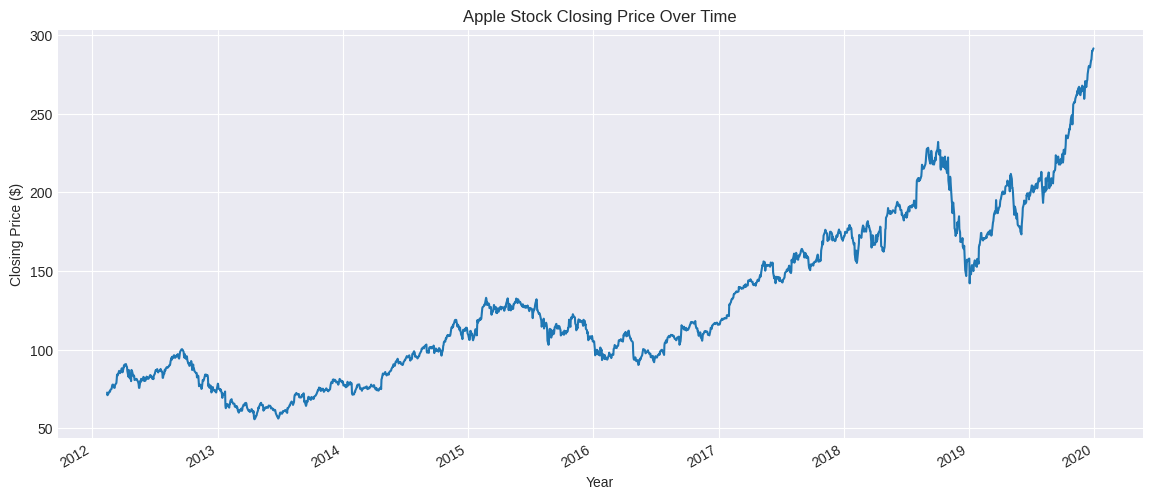

In [17]:
# Closing Price Over Time

df['Close'].plot(title='Apple Stock Closing Price Over Time')
plt.ylabel('Closing Price ($)')
plt.xlabel('Year')
plt.show()

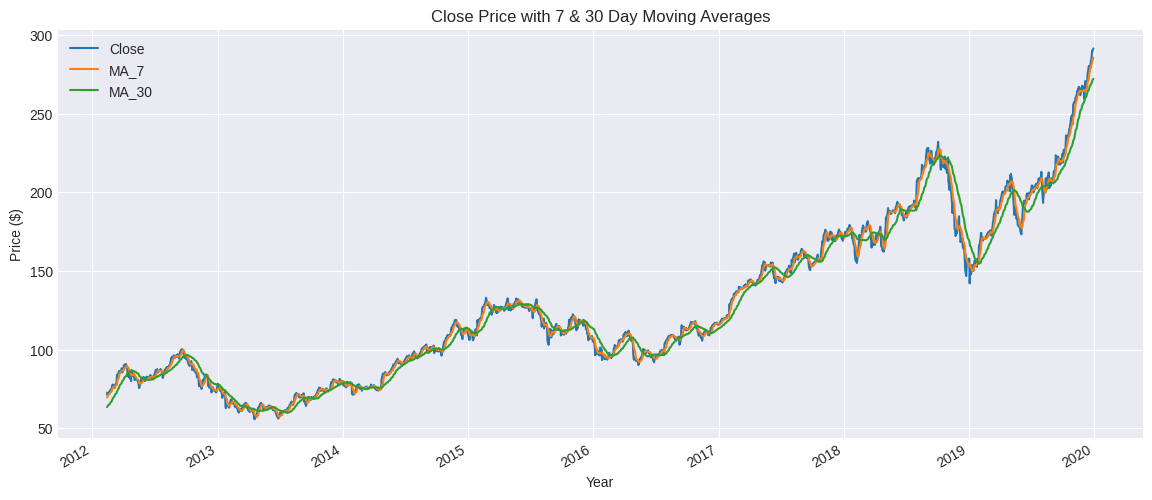

In [18]:
# Moving Averages

df[['Close', 'MA_7', 'MA_30']].plot(title='Close Price with 7 & 30 Day Moving Averages')
plt.ylabel('Price ($)')
plt.xlabel('Year')
plt.show()


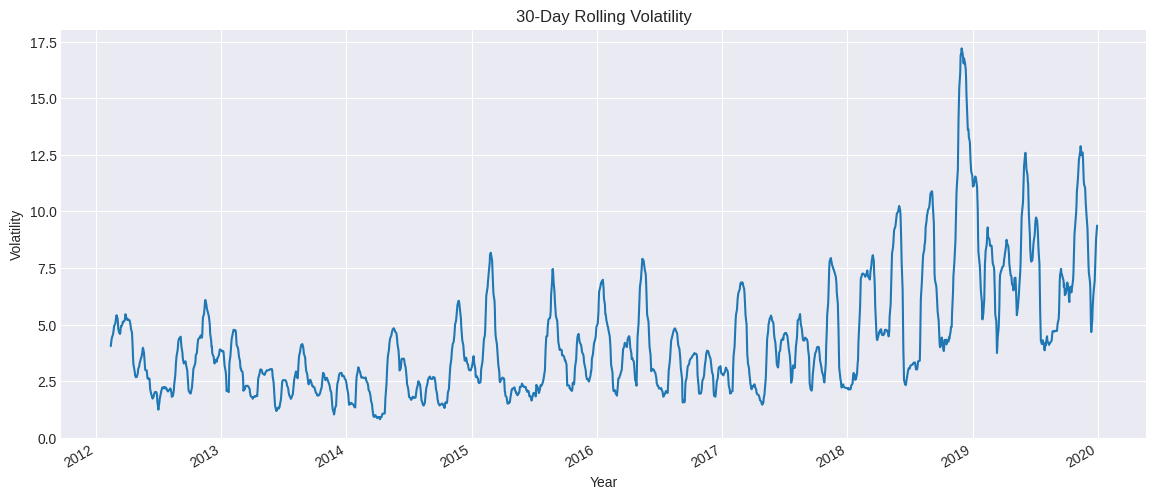

In [19]:
# Rolling Volatility (30 Days)

df['Volatility_30'].plot(title='30-Day Rolling Volatility')
plt.ylabel('Volatility')
plt.xlabel('Year')
plt.show()


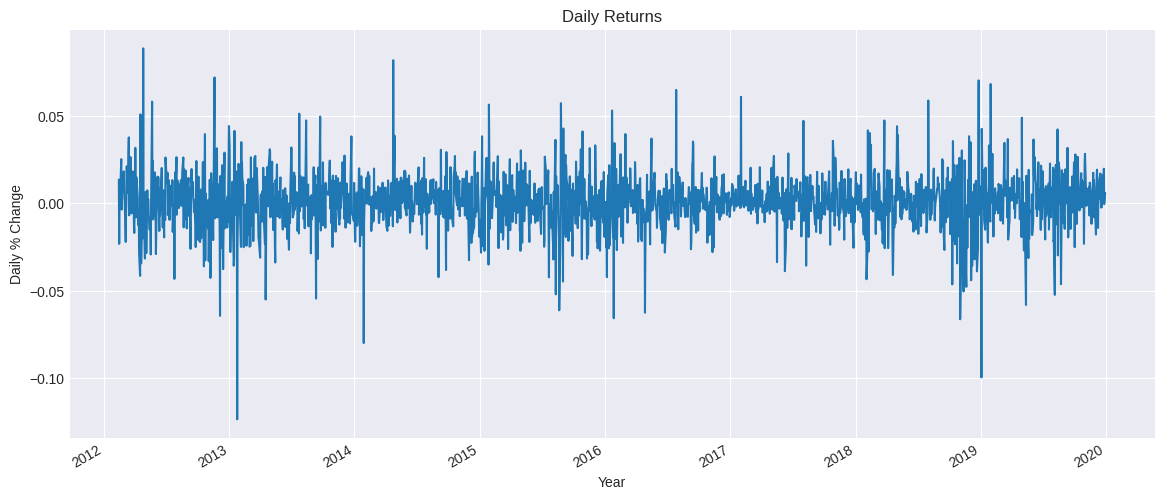

In [20]:
# Daily Returns

df['Return'].plot(title='Daily Returns')
plt.ylabel('Daily % Change')
plt.xlabel('Year')
plt.show()


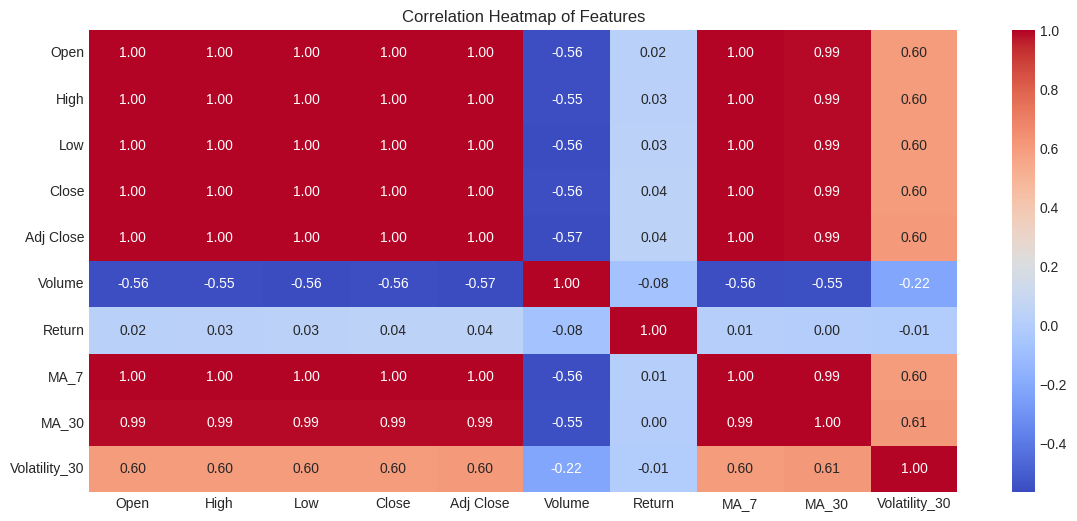

In [21]:
# Correlation Heatmap

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

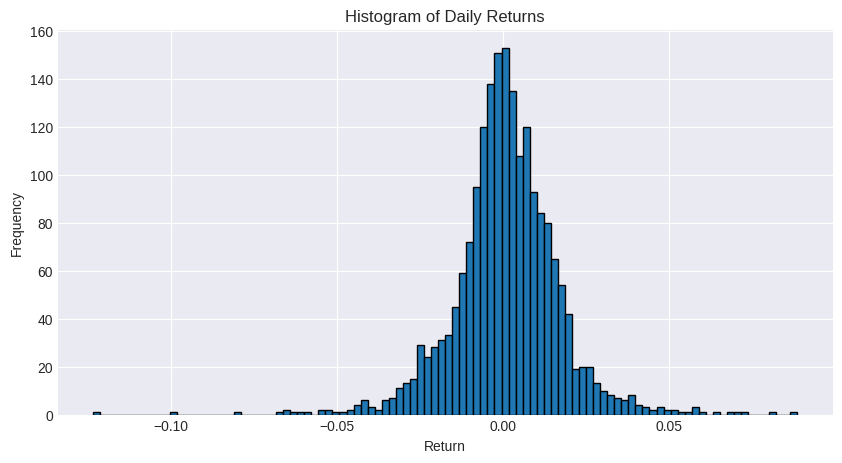

In [22]:
# Histogram of Daily Returns

plt.figure(figsize=(10, 5))
df['Return'].hist(bins=100, edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/tmp/ipython-input-23-750121606.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Close'].resample('M').mean()


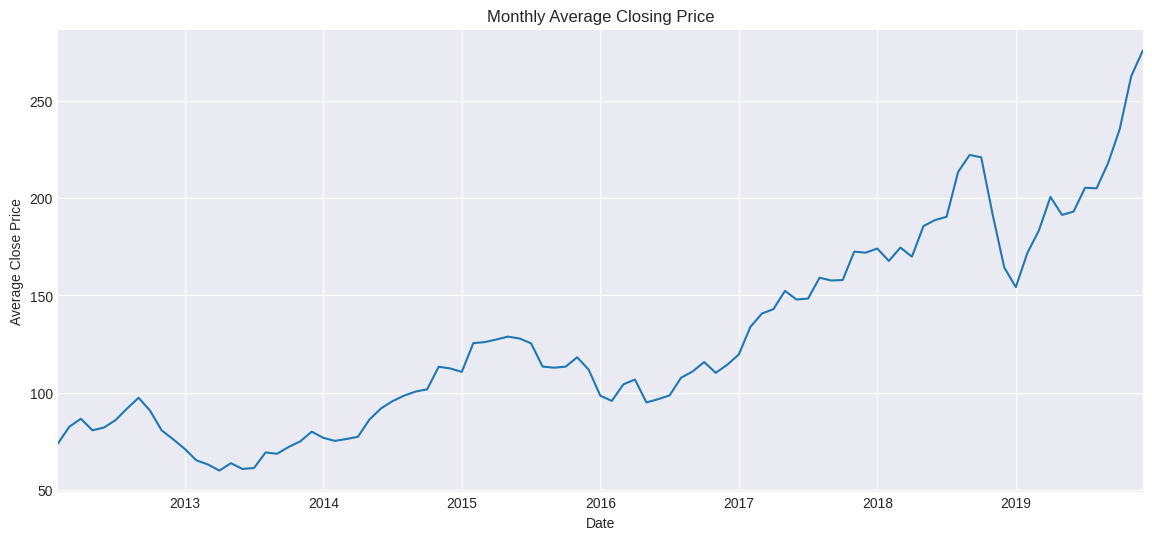

In [23]:
# Average Monthly Closing Price (Seasonality)

monthly_avg = df['Close'].resample('M').mean()
monthly_avg.plot(title='Monthly Average Closing Price')
plt.ylabel('Average Close Price')
plt.xlabel('Date')
plt.show()


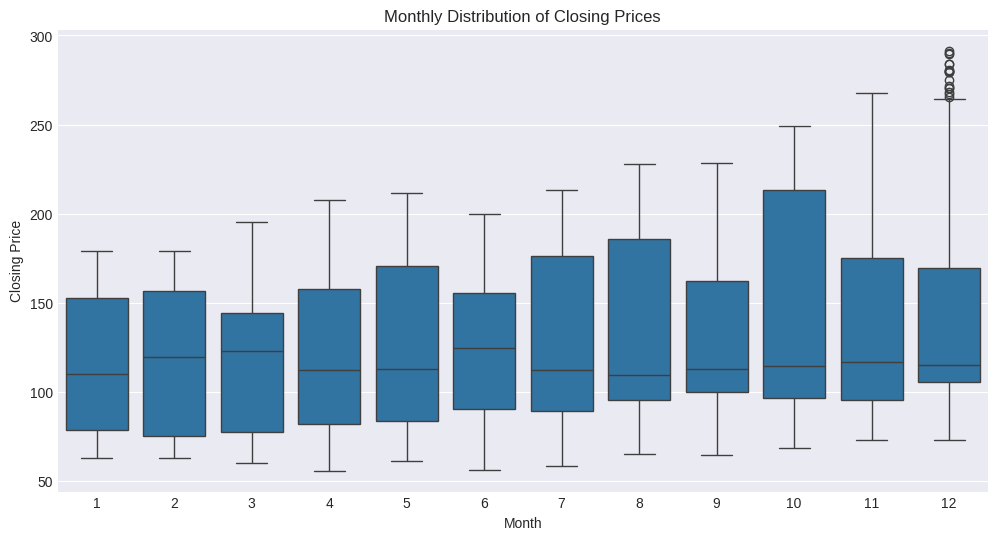

In [24]:
# Boxplot of Closing Prices by Month (Seasonal Volatility)

df['Month'] = df.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Close', data=df)
plt.title('Monthly Distribution of Closing Prices')
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.show()

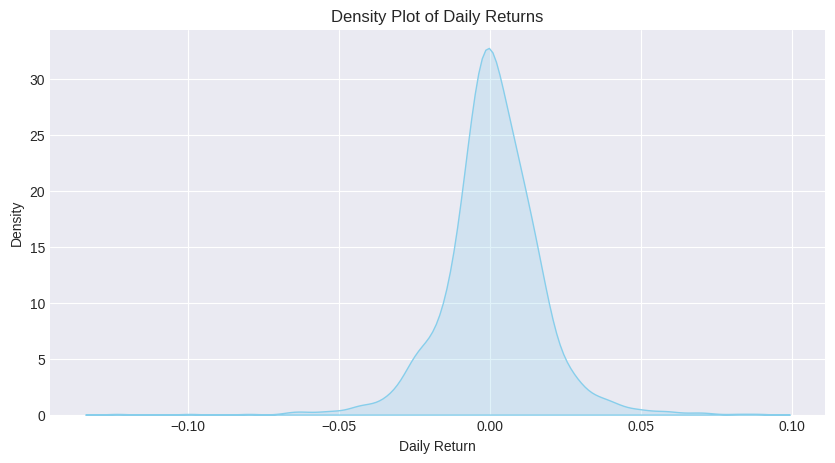

In [25]:
# KDE (Distribution) Plot of Returns

plt.figure(figsize=(10, 5))
sns.kdeplot(df['Return'], fill=True, color='skyblue')
plt.title('Density Plot of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.grid(True)
plt.show()


### This step will help us visually understand:

- Price trends

- Volatility

- Moving averages

- Return behavior

- Correlation between features

## Modeling

In [26]:
pip install statsmodels xgboost scikit-learn

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Forecast target
target = 'Close'

# Split: last 30 days for testing
train = df.iloc[:-30]
test = df.iloc[-30:]

### 1) ARIMA (Autoregressive Integrated Moving Average) – basic trend-based forecasting

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(train[target], order=(5, 1, 0))  # (p,d,q)
arima_result = arima_model.fit()

# Forecast next 30 days
arima_forecast = arima_result.forecast(steps=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [39]:
evaluate(test[target], arima_forecast, 'ARIMA')

ARIMA - RMSE: 13.21, MAE: 9.86


### 2) SARIMA (Seasonal ARIMA) -  adds seasonality to ARIMA

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
# Fit SARIMA model
sarima_model = SARIMAX(train[target], order=(5,1,0), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

# Forecast next 30 days
sarima_forecast = sarima_result.forecast(steps=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [38]:
evaluate(test[target], sarima_forecast, 'SARIMA')

SARIMA - RMSE: 11.02, MAE: 8.05


### 3) XGBoost Regression -  powerful ML model for structured data

In [32]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Features
features = ['Open', 'High', 'Low', 'Volume', 'Return', 'MA_7', 'MA_30', 'Volatility_30']
X_train = train[features]
y_train = train[target]
X_test = test[features]

# Fit model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Forecast
xgb_forecast = xgb.predict(X_test)

In [37]:
evaluate(test[target], xgb_forecast, 'XGBoost')

XGBoost - RMSE: 21.74, MAE: 18.68


### 4) Random Forest Regression -  ensemble of decision trees for regression

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Fit model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Forecast
rf_forecast = rf.predict(X_test)

In [36]:
evaluate(test[target], rf_forecast, 'Random Forest')

Random Forest - RMSE: 15.17, MAE: 11.74


### Model Evaluation:

In [34]:
def evaluate(y_true, y_pred, label):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f'{label} - RMSE: {rmse:.2f}, MAE: {mae:.2f}')

In [35]:
evaluate(test[target], arima_forecast, 'ARIMA')
evaluate(test[target], sarima_forecast, 'SARIMA')
evaluate(test[target], xgb_forecast, 'XGBoost')
evaluate(test[target], rf_forecast, 'Random Forest')

ARIMA - RMSE: 13.21, MAE: 9.86
SARIMA - RMSE: 11.02, MAE: 8.05
XGBoost - RMSE: 21.74, MAE: 18.68
Random Forest - RMSE: 15.17, MAE: 11.74


## Final Verdict:
- SARIMA is the best model for your Apple stock prediction — lowest RMSE and MAE.

- ARIMA is second best, good for modeling general trends.

- Random Forest is okay, but not as precise.

- XGBoost performed poorly on this time series data without extra feature tuning

## Streamlit Deployment :

In [40]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [77]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and clean data
df = pd.read_csv('AAPL.csv', parse_dates=['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Clean and prepare
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)
df.sort_index(inplace=True)
df.index = pd.to_datetime(df.index)
df = df.asfreq('B')  # ✅ Ensures proper frequency for time series

# Streamlit UI
st.title("📈 Apple Stock Price Forecast (Next 30 Days)")

if st.button("Predict"):
    st.info("Generating forecast...")

    try:
        # Use data excluding last 30 days for training
        train_data = df['Close'][:-30]

        # Create future business dates
        last_date = df.index[-1]
        future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

        # Fit SARIMA model
        model = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
        results = model.fit(disp=False)

        # Forecast
        forecast = results.forecast(steps=30)
        forecast_df = pd.DataFrame({'Forecast': forecast.values}, index=future_dates)

        # Display forecast table
        st.subheader("📊 Forecasted Closing Prices")
        forecast_df_display = forecast_df.copy()
        forecast_df_display.index = forecast_df_display.index.strftime('%Y-%m-%d')

        st.dataframe(forecast_df_display.style.format("{:.2f}"))


        # Plot forecast
        st.subheader("📈 Forecast Chart")
        plt.figure(figsize=(12, 5))
        plt.plot(df['Close'][-90:], label='Actual Price')
        plt.plot(forecast_df['Forecast'], label='Forecasted Price', color='red')
        plt.legend()
        plt.grid(True)
        st.pyplot(plt)

        # Optional: Download forecast
        csv = forecast_df.to_csv().encode('utf-8')
        st.download_button("📥 Download Forecast as CSV", csv, "forecast.csv", "text/csv")

    except Exception as e:
        st.error(f"⚠️ Forecasting failed: {e}")

Overwriting app.py


In [80]:
from pyngrok import ngrok

ngrok.kill()

# Only once per session
ngrok.set_auth_token("2ixGKMItgl3qjg1HI0OOgMBkCEQ_87W8zxYY4j95wdDCs7aMr")

# Run your Streamlit app (in the background)
!streamlit run app.py &> /dev/null &

# Create public URL
public_url = ngrok.connect(8501, "http")
print("🌐 Your Streamlit app is live at:", public_url)

🌐 Your Streamlit app is live at: NgrokTunnel: "https://a8f7-34-81-54-234.ngrok-free.app" -> "http://localhost:8501"
